# Intro to Convolutional nets for Image Classification

Convolutional Neural Networks preserve the dimension of input pixels by using a smaller portion of the input matrix to learn the input-output relationship. The square is shifted to be progressively applied to the whole input matrix and feature are progressibely learned on the input image, consequently allowing for position-independent detection of objects from the scene.
- https://machinelearningmastery.com/crash-course-convolutional-neural-networks/
- http://cs231n.github.io/convolutional-networks/

A CNN consists of:
- convolution layers, normally placed at the very beginning of the network, which are necessary to convolute the input matrix with a smaller matrix, called filter, which is slided over and multiplied with the input matrix, consequently performing a convolution operation. As such the convolution matrix can also act as a filter. Since the pixels at the border would only be considered once, padding is also normally used to make sure pixels across the image are all considered alike. The convolution, i.e. the multiplication of the input matrix with the filter, produce a third matrix whose values are all added up, thus resulting with one number for each location of the sliding window. After sliding the filter on all locations of the input matrix, what results is a smaller matrix called activation or feature map.
The convolution layer performs the actual feature extraction and is as such always at the beginning of the overall network.
- pooling layers perform a downsampling, i.e. they maps the input matrix to another matrix of different dimension, in order to perform a summarization of the input matrix. Typical pooling layers are Max and Average pooling, respectively performing the max or average of adjacent pixels.
- fully-connected or dense layers, which consist of a classic feed-forward neural network equipped with a non-linear or a softmax activation function, as they are normally placed at the very end of the CNN since they are necessary to perform the final classification.

Consequently we typically have:
1. an input image matrix of RGB values (i.e., of size n x m x 3)
2. a convolution layer performing the feature extraction, which is normally followed by a ReLu-based layer
4. a pooling layer to downsample the resulting feature matrix
5. a fully-connected layer performing the classification function

In fact, CNNs are normally composed of multiple convolution and pooling steps. Specifically, the output of the first convolutional layer (i.e., the feature matrix) becomes the input to the following one, meaning that the network produces activation matrices that progressively extract increasingly complex features.

Using TensorFlow backend.


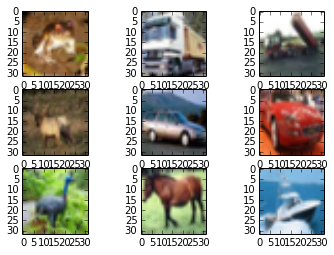

In [1]:
%matplotlib inline
# https://machinelearningmastery.com/object-recognition-convolutional-neural-networks-keras-deep-learning-library/
from matplotlib import pyplot
from matplotlib.pyplot import imshow

from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#from keras.datasets import cifar100
#(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    imshow(X_train[i])
    imgplot = pyplot.imshow(X_train[i])

In [9]:
# set the initial seed
import numpy as np
seed = 1234

In [3]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
from keras.utils import np_utils
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print "num_classes", num_classes

num_classes 10


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
K.set_image_dim_ordering('th')

## Shallow CNNs

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 3)         9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 3)         9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
__________

In [8]:
np.random.seed(seed)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 46s 919us/step - loss: 1.8751 - acc: 0.3121 - val_loss: 1.6548 - val_acc: 0.4076
Epoch 2/25
50000/50000 [==============================] - 38s 765us/step - loss: 1.6573 - acc: 0.4030 - val_loss: 1.6302 - val_acc: 0.4269
Epoch 3/25
50000/50000 [==============================] - 35s 698us/step - loss: 1.5713 - acc: 0.4380 - val_loss: 1.4992 - val_acc: 0.4621
Epoch 4/25
50000/50000 [==============================] - 38s 755us/step - loss: 1.5116 - acc: 0.4585 - val_loss: 1.4280 - val_acc: 0.4943
Epoch 5/25
50000/50000 [==============================] - 37s 738us/step - loss: 1.4741 - acc: 0.4719 - val_loss: 1.4025 - val_acc: 0.4972
Epoch 6/25
50000/50000 [==============================] - 37s 732us/step - loss: 1.4336 - acc: 0.4876 - val_loss: 1.3806 - val_acc: 0.5133
Epoch 7/25
50000/50000 [==============================] - 38s 752us/step - loss: 1.4054 - acc: 0.4953 - val_loss: 1.

In [9]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 56.45%


## Deeper CNNs

In [22]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
"""
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
"""
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [23]:
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 32, 32, 3)         9248      
_________________________________________________________________
dropout_21 (Dropout)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 32, 32, 3)         9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 32, 16, 1)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              525312    
__________

In [24]:
np.random.seed(seed)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 42s 843us/step - loss: 1.9071 - acc: 0.3029 - val_loss: 1.6694 - val_acc: 0.4015
Epoch 2/25
50000/50000 [==============================] - 40s 803us/step - loss: 1.6788 - acc: 0.3919 - val_loss: 1.5473 - val_acc: 0.4463
Epoch 3/25
50000/50000 [==============================] - 41s 823us/step - loss: 1.5778 - acc: 0.4288 - val_loss: 1.4819 - val_acc: 0.4660
Epoch 4/25
50000/50000 [==============================] - 39s 784us/step - loss: 1.5145 - acc: 0.4581 - val_loss: 1.4218 - val_acc: 0.4905
Epoch 5/25
50000/50000 [==============================] - 39s 780us/step - loss: 1.4644 - acc: 0.4723 - val_loss: 1.4002 - val_acc: 0.4935
Epoch 6/25
50000/50000 [==============================] - 39s 781us/step - loss: 1.4291 - acc: 0.4869 - val_loss: 1.3882 - val_acc: 0.4947
Epoch 7/25
50000/50000 [==============================] - 46s 924us/step - loss: 1.3961 - acc: 0.5014 - val_loss: 1.